<a href="https://colab.research.google.com/github/ameenapullani/CAPSTONE-PROJECT/blob/main/CAPSTONE_PROJECT_ML_BANK_LOAN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **##PERSONAL LOAN PREDICTION MODEL**

**Name** : AMEENA PULLANI

**Organization:** Entri Elevate

**Date:** 11 October 2024

## 1. **Overview of Problem Statement:**



This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.



## 2. **Objective:**

The classification goal is to build a model which will be used to predict which customer will most likely to accept the offer for personal loan, based on the specific relationship with the bank across various features given in the dataset. We will be using supervised learning methods such as Logistic Regression, Support Vector Mchine, Multi-layer Perceptron classifier, Random forest and Gradient boosting classifier.

## 3. **Data Description:**


- Source:https://www.kaggle.com/datasets/mbsoroush/personal-loan-dataset/data

**Description of features:**

1- ID: Customer ID

2- Age: Customer's age in completed years

3- Experience: years of professional experience

4- Income: Annual income of the customer

5- ZIP Code: Home Address Zip Code

6- Family: Family size of the customer

7- CCAvg: Avg. Spending on Credit Card per Month

8- Education: Education Level. (1: Undergrad; 2: Graduate; 3: Advanced / Professional)

9- Mortgage: Value of house mortgage

10- Personal Loan: Did this customer accept the personal loan offered in the last campaign? (0: No ;1: Yes)

11- Securities Account: Does the customer have a securities account with the bank? (0: No ;1: Yes)

12- CD Account: Does the customer have a certificate of deposit (CD) account with the bank? (0: No ;1: Yes)

13- Online: Does the customer use internet banking facilities? (0: No ;1: Yes)

14- Credit card: Does the customer use a credit card issued by this Bank? (0: No ;1: Yes)

## 4. **Data Collection:**

In [ ]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

# First 10 rows of the dataset
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
#Number of rows and columns
df.shape

(5000, 14)

In [ ]:
# Unique values
df.nunique()

,0
ID,5000
Age,45
Experience,47
Income,162
ZIP Code,467
Family,4
CCAvg,108
Education,3
Mortgage,347
Personal Loan,2


In [ ]:
# Count of categorical values
df[ 'Education'].value_counts(),df[ 'Securities Account'].value_counts(),df[ 'CD Account'].value_counts(),df[ 'Online'].value_counts(),df[ 'CreditCard'].value_counts()

(Education
 1    2096
 3    1501
 2    1403
 Name: count, dtype: int64,
 Securities Account
 0    4478
 1     522
 Name: count, dtype: int64,
 CD Account
 0    4698
 1     302
 Name: count, dtype: int64,
 Online
 1    2984
 0    2016
 Name: count, dtype: int64,
 CreditCard
 0    3530
 1    1470
 Name: count, dtype: int64)

In [ ]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## 5. **Data Preprocessing - Data Cleaning:**

The Experience column has some negative values, which might need to be addressed by converting to absolute values.

In [ ]:
# Handle negative values in the 'Experience' column
df['Experience'] = df['Experience'].apply(lambda x: abs(x))

In [ ]:
# Verifying correction
print("Summary of 'Experience' after correction:")
print(df['Experience'].describe())

Summary of 'Experience' after correction:
count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64


In [ ]:
df["Personal Loan"].value_counts()

,count
Personal Loan,
0,4520
1,480


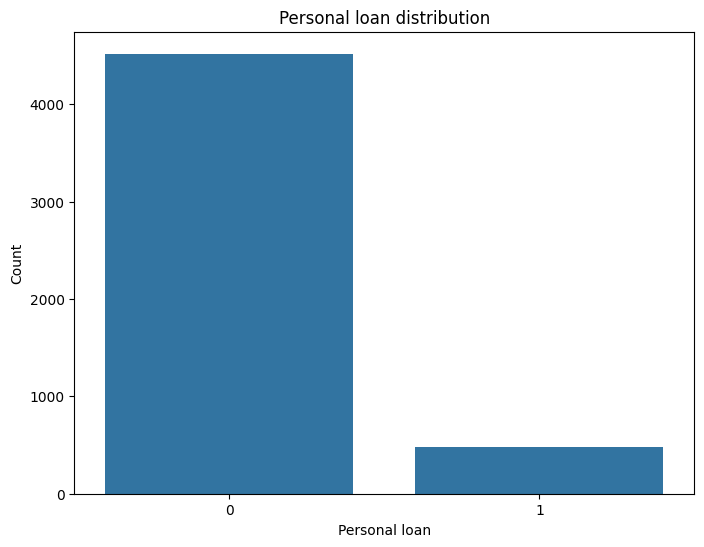

In [ ]:
#Check whether the data is imbalanced
plt.figure(figsize=(8,6))
sns.countplot(x=df['Personal Loan'])
plt.title('Personal loan distribution')
plt.xlabel('Personal loan')
plt.ylabel('Count')
plt.show()


**OBSERVATION:**


The data is significantly imbalanced, with the majority class (0) and minority class (1) by a ratio of 10:1.
Here we use **SMOTE (Synthetic Minority Over-sampling Technique)** which is a powerful method to handle this imbalance by generating synthetic data points for the minority class.



In [ ]:
# Oversampling method by using SMOTE
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = df.drop('Personal Loan', axis = 1)
y = df['Personal Loan']

#Apply SMOTE to the minority class
SMOTE = SMOTE(random_state=42)
X_resampled, y_resampled = SMOTE.fit_resample(X, y)

#Create new data using resampled data
df_balanced = pd.concat([X_resampled, y_resampled], axis =1)

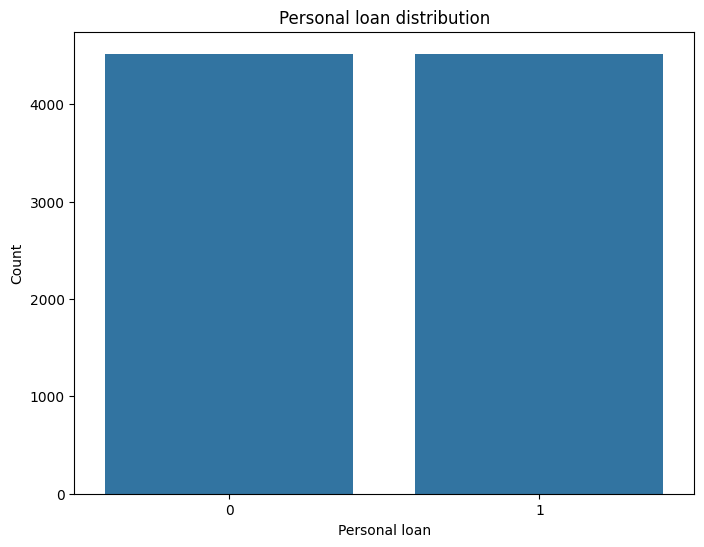

In [ ]:
#Rechecking
plt.figure(figsize=(8,6))
sns.countplot(x=df_balanced['Personal Loan'])
plt.title('Personal loan distribution')
plt.xlabel('Personal loan')
plt.ylabel('Count')
plt.show()

In [ ]:
#Number of rows and columns of balanced dataset
df_balanced.shape

(9040, 14)

In [ ]:
# Check for missing values
print(df_balanced.isnull().sum())

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64


### **Skewness check**

In [ ]:
# Check skewness of numerical features

numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
print("Skewness of numerical features:")
print(df_balanced[numerical_features].skew())

Skewness of numerical features:
Age           0.019464
Experience    0.035091
Income       -0.166197
CCAvg         0.672543
Mortgage      1.822826
dtype: float64


**OBSERVATION:**

Mortgage and CCAvg : High positive skewness, which might require transformations.

Age, Experience, and Income : Have low skewness, so no transformation is needed.

Log transformation is applied to Mortgage and CCAvg.

In [ ]:
# log transformation to 'CCAvg' and 'Mortgage'
df_balanced['CCAvg'] = np.log1p(df_balanced['CCAvg'])
df_balanced['Mortgage'] = np.log1p(df_balanced['Mortgage'])

# Verify skewness after transformation
print("\nSkewness of numerical features after transformation:")
print(df_balanced[numerical_features].skew())



Skewness of numerical features after transformation:
Age           0.019464
Experience    0.035091
Income       -0.166197
CCAvg        -0.270876
Mortgage      0.586885
dtype: float64


Age: Symmetric

Experience: Symmetric

Income: Moderately symmetric

CCAvg: Symmetric

Mortgage: The skewness has decreased but is still slightly above the 0.5 threshold, indicating a remaining positive skew.. To make more symmetric, tried another transformation(Square root transformation).

In [ ]:
df_balanced['Mortgage'] = np.cbrt(df_balanced['Mortgage'])

# Verify skewness after transformation
print("\nSkewness of numerical features after transformation:")
print(df_balanced[numerical_features].skew())


Skewness of numerical features after transformation:
Age           0.019464
Experience    0.035091
Income       -0.166197
CCAvg        -0.270876
Mortgage      0.490079
dtype: float64


Mortgage (0.490079): The skewness has been reduced to acceptable range (below 0.5), indicating a balanced distribution.


*   **Outlier Detection**

Outliers are data points that significantly differ from the rest of the dataset which can affect the performance of machine learning models by distorting the analysis. Detecting of outliers are done by usimg Boxplots.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

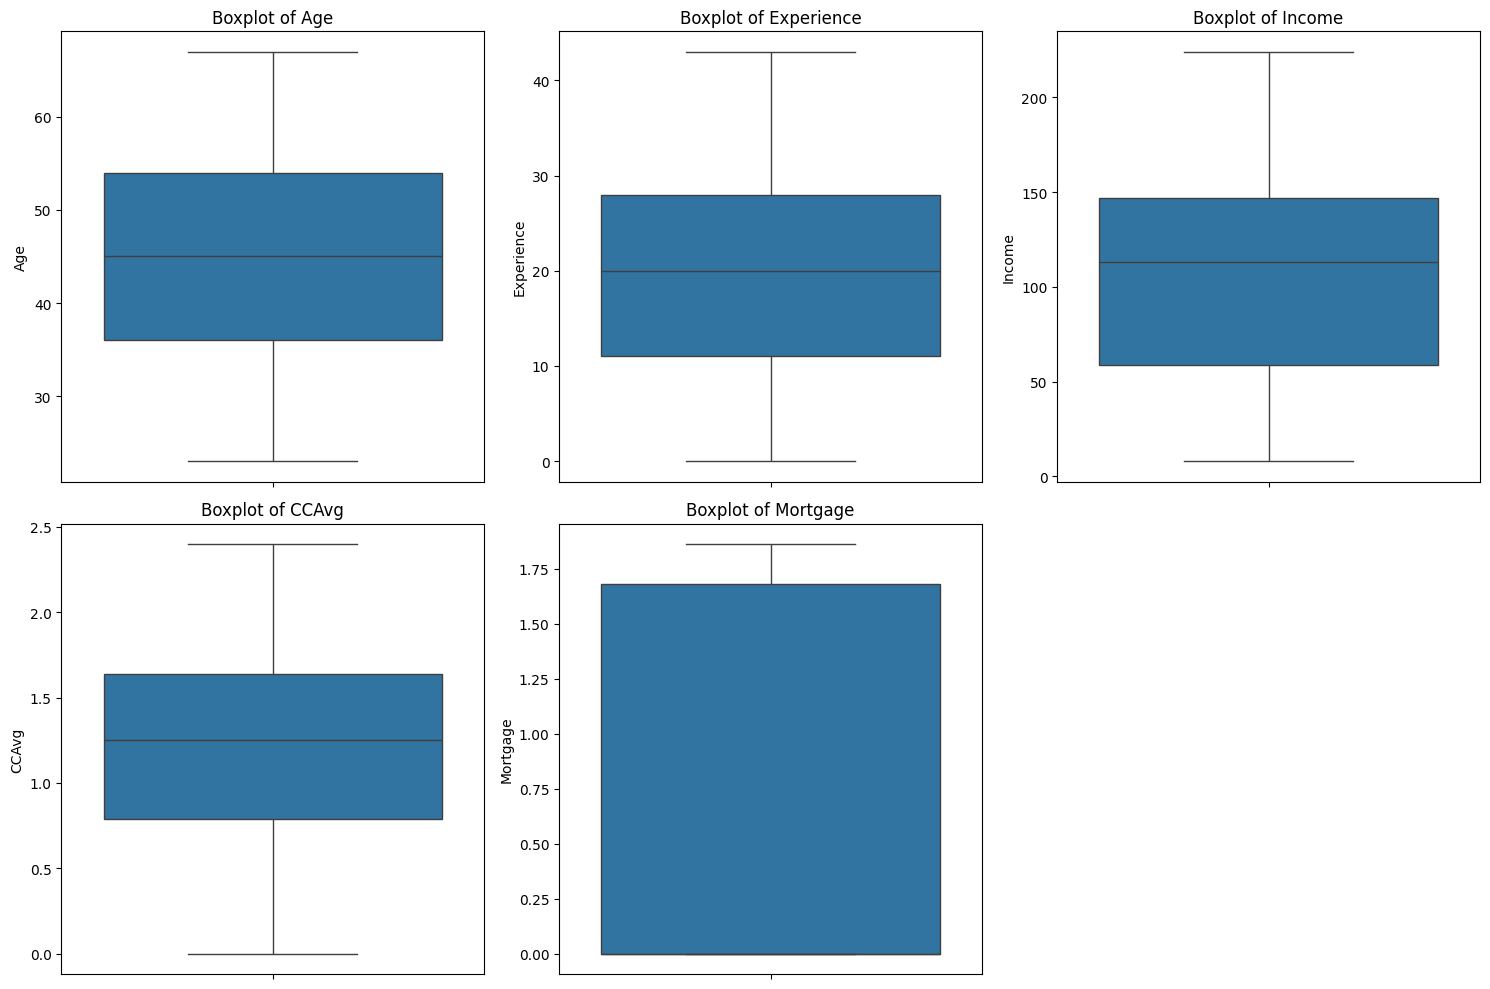

In [ ]:
# Outliers detection using Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']):
  plt.subplot(2, 3, i + 1)
  sns.boxplot(data=df_balanced, y=col)
  plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


Observation:

No Outliers are detected here.

## 6. **Exploratory Data Analysis (EDA):**

i. Univariate Analysis

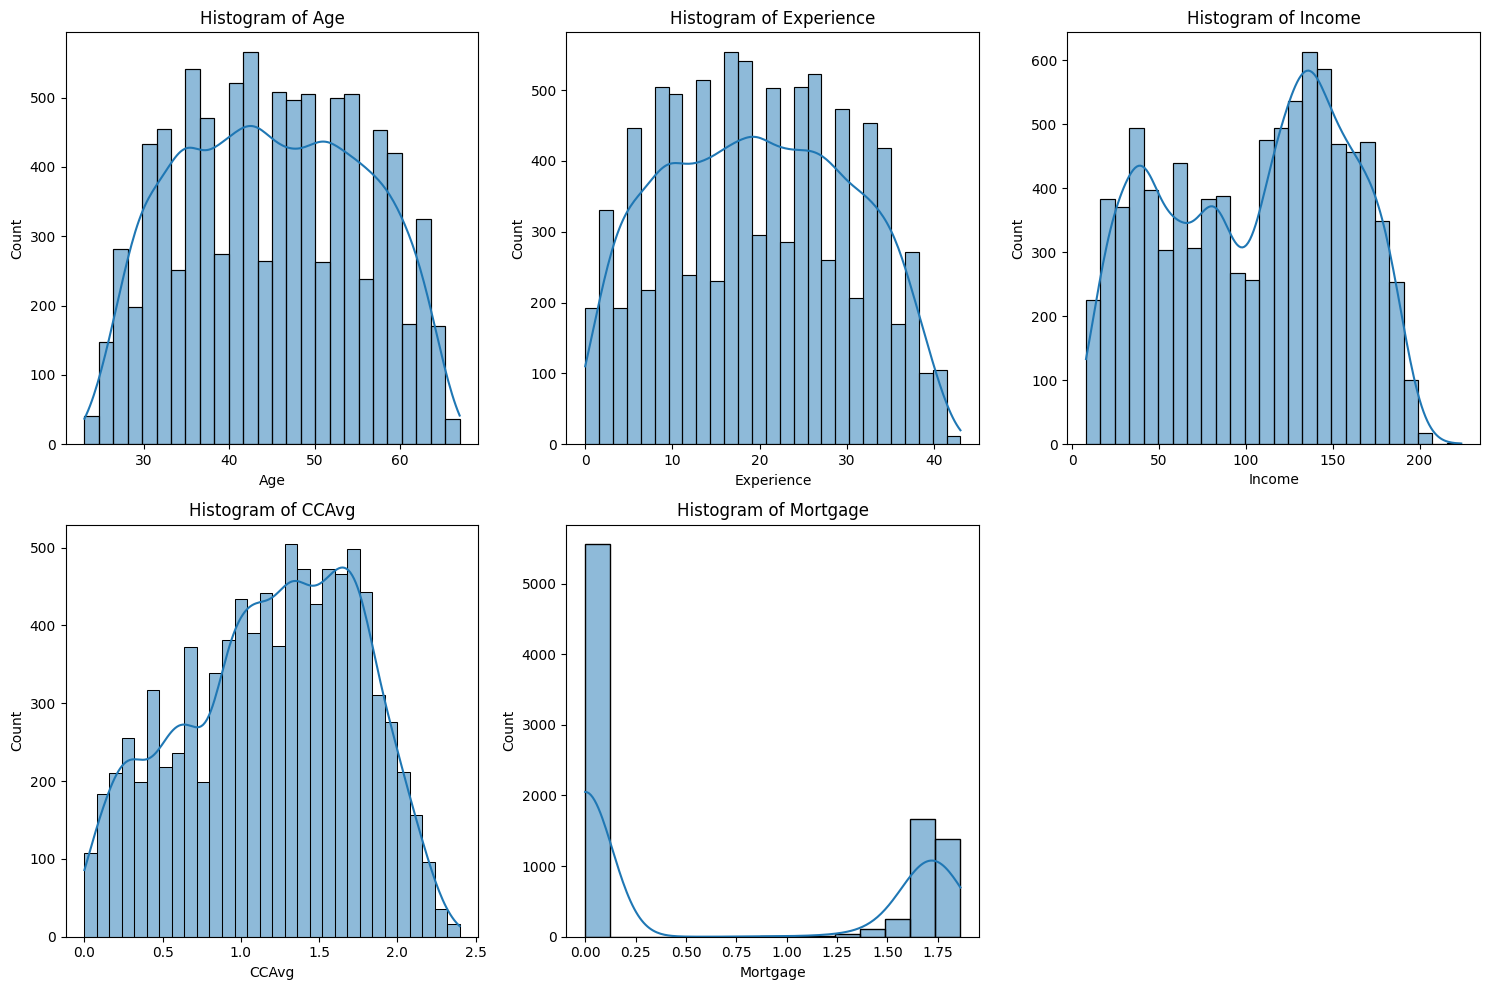

In [ ]:
numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
# Histograms for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_balanced[feature], kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

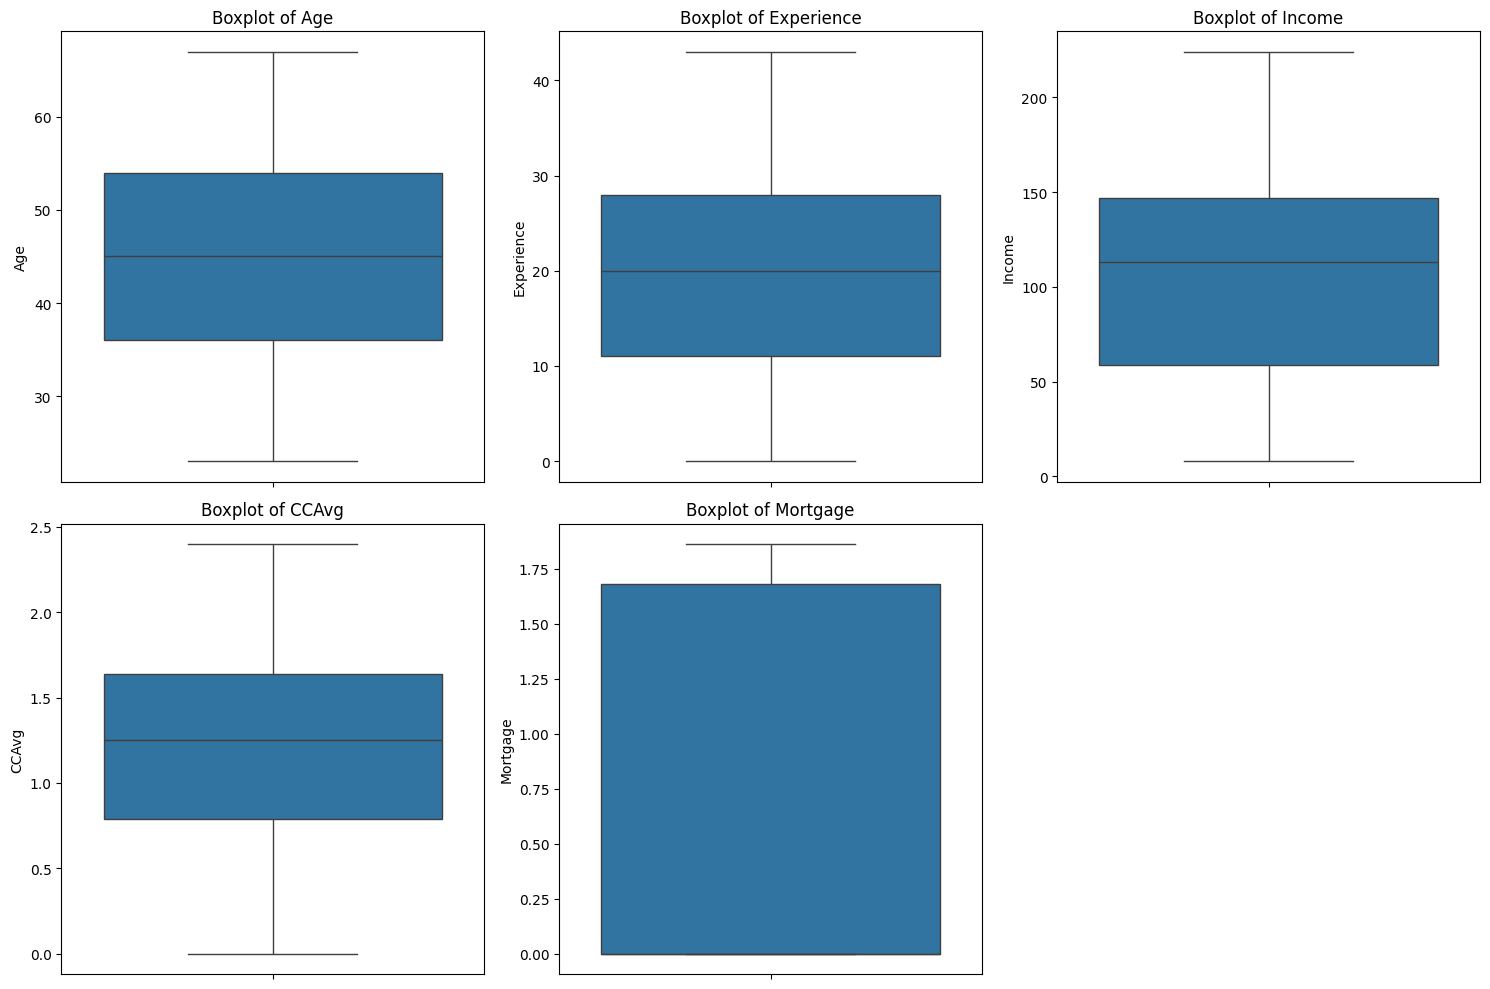

In [ ]:
# Boxplots for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_balanced[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

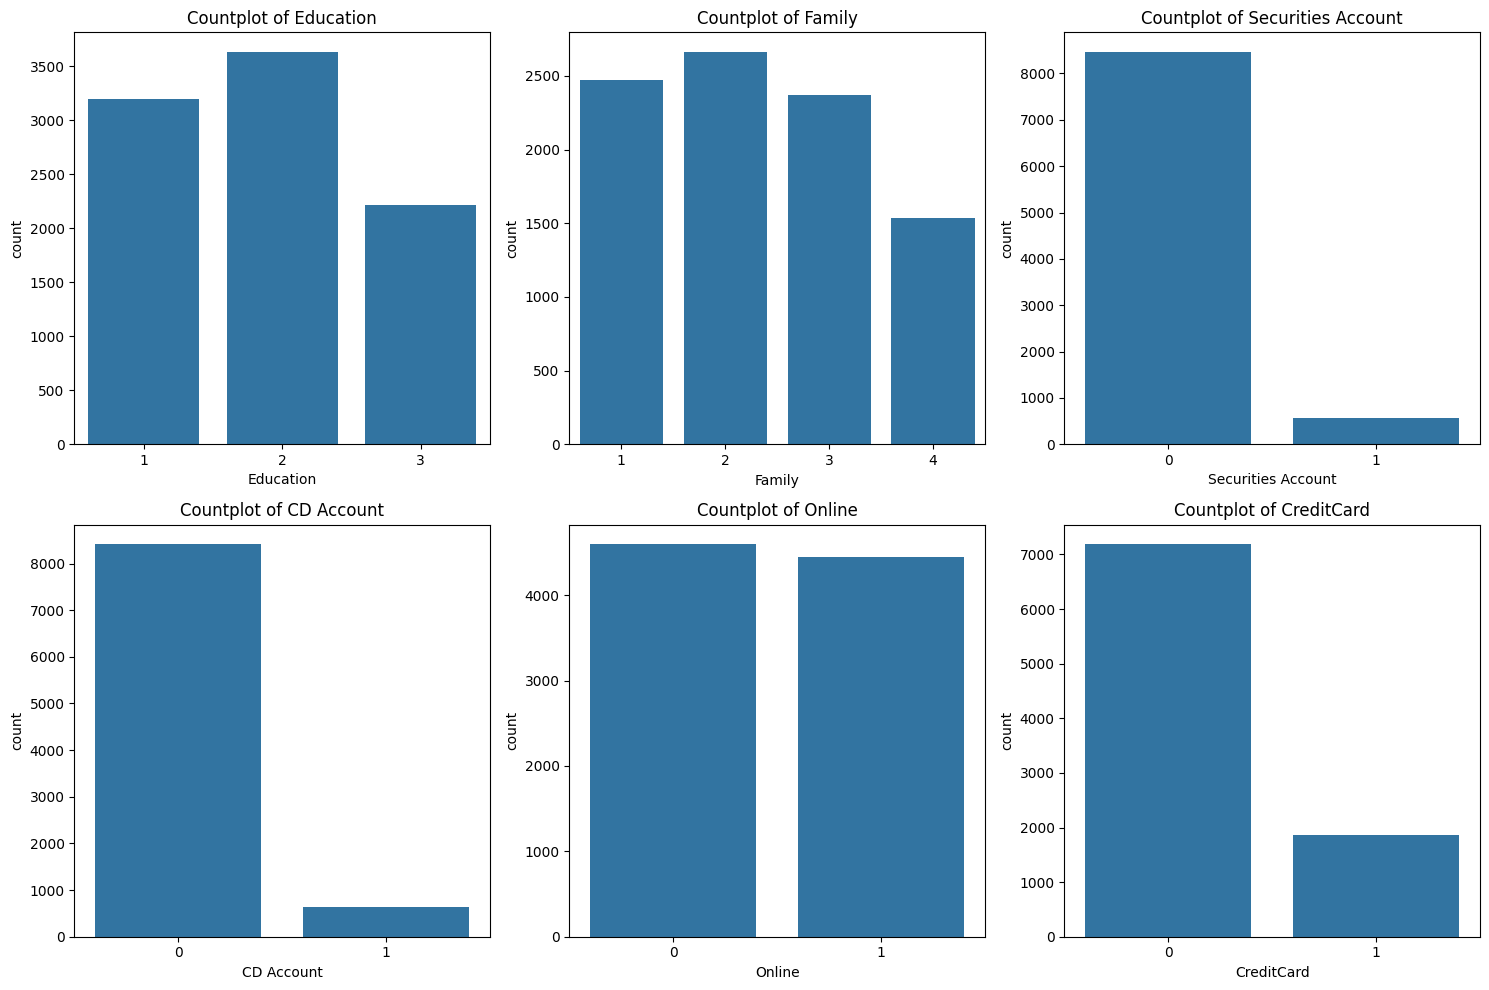

In [ ]:
categorical_features = ['Education', 'Family', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

# Count plots for categorical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df_balanced[feature])
    plt.title(f'Countplot of {feature}')
plt.tight_layout()
plt.show()

ii.Bivariate Analysis

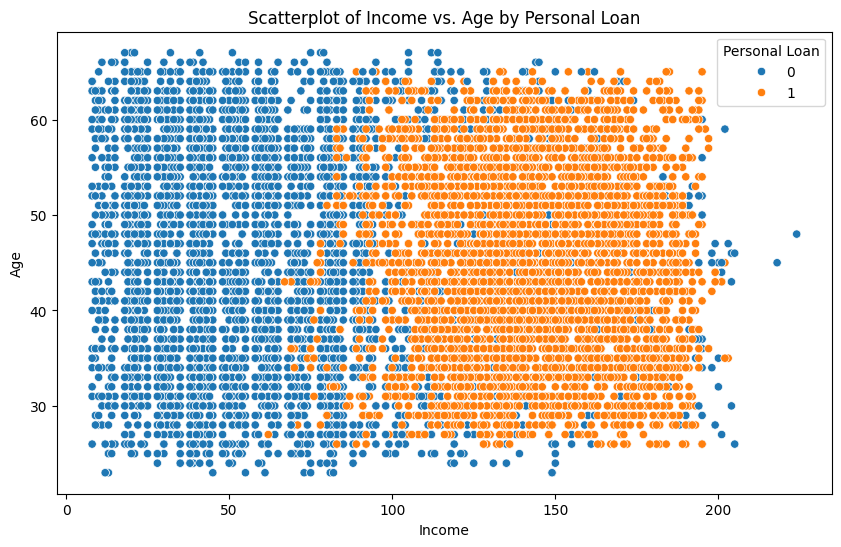

In [ ]:
# Scatter plot of Income vs. Age, colored by Personal Loan
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_balanced['Income'], y=df_balanced['Age'], hue=df_balanced['Personal Loan'])
plt.title('Scatterplot of Income vs. Age by Personal Loan')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


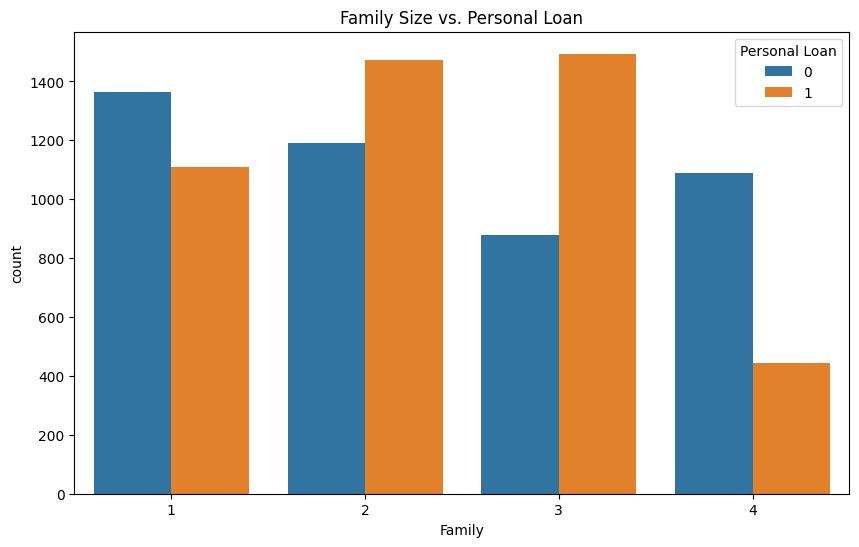

In [ ]:
# Bar plot of Family size vs. Personal Loan
plt.figure(figsize=(10, 6))
sns.countplot(x=df_balanced['Family'], hue=df_balanced['Personal Loan'])
plt.title('Family Size vs. Personal Loan')
plt.show()



iii. Multivariate Analysis

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

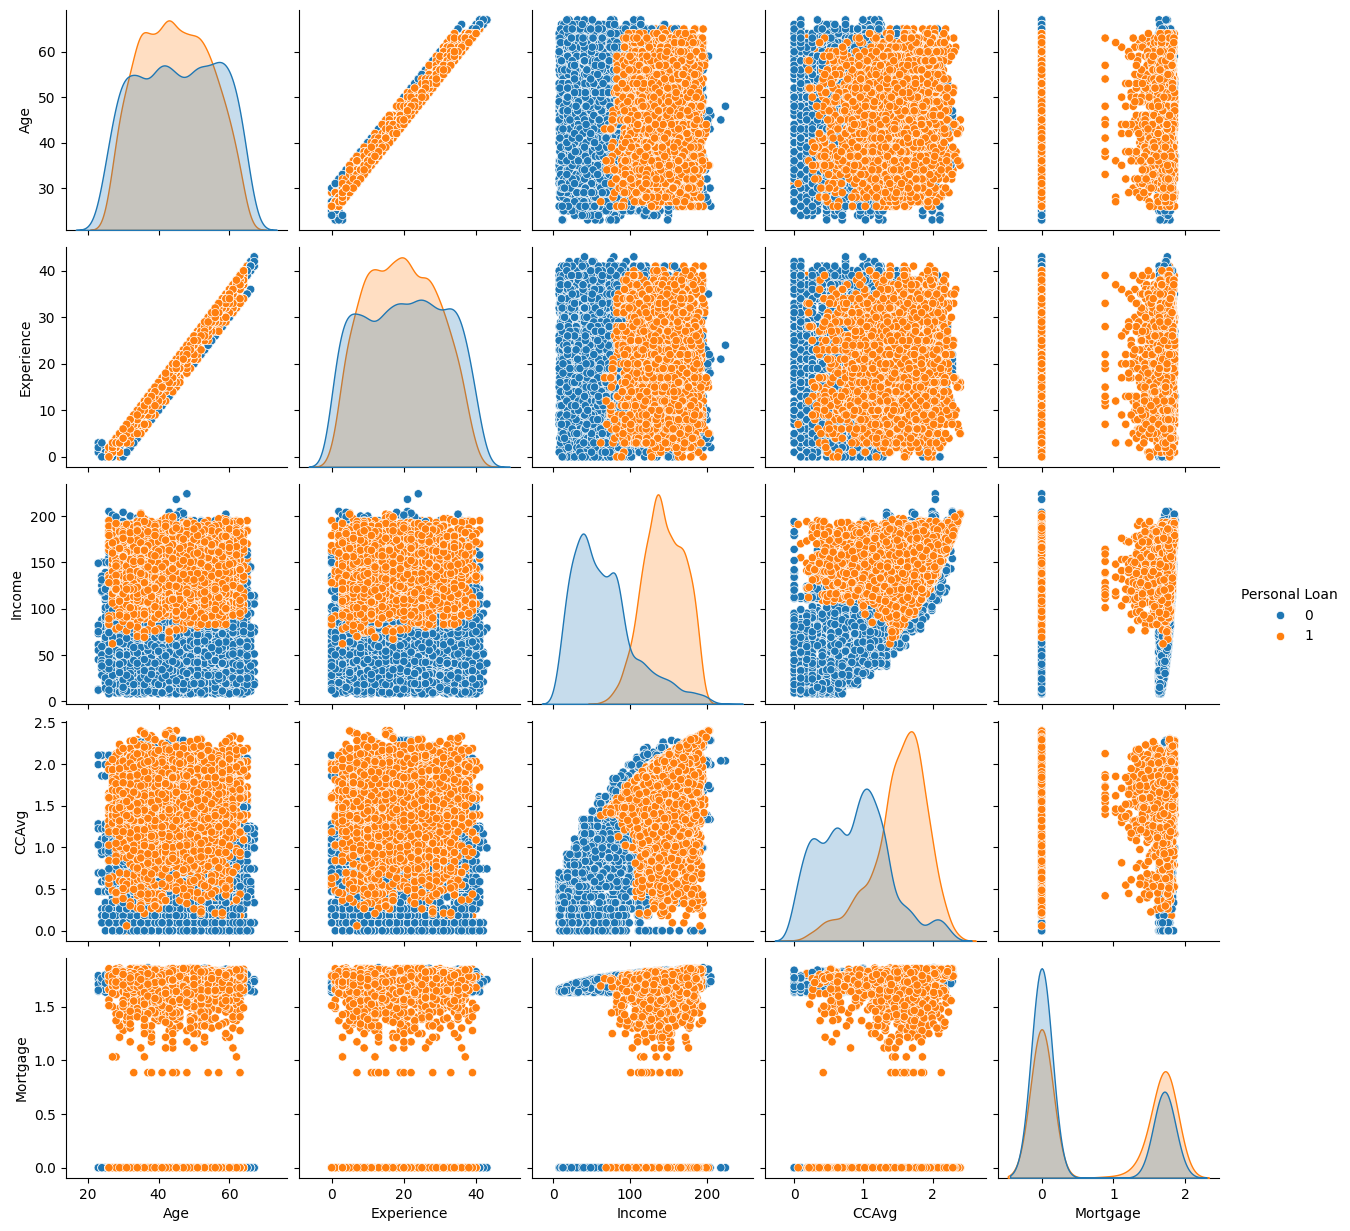

In [ ]:
# Pairplot for selected features
selected_features=['Age', 'Experience', 'Income','CCAvg','Mortgage','Personal Loan']
sns.pairplot(df_balanced[selected_features],hue='Personal Loan')
plt.show()

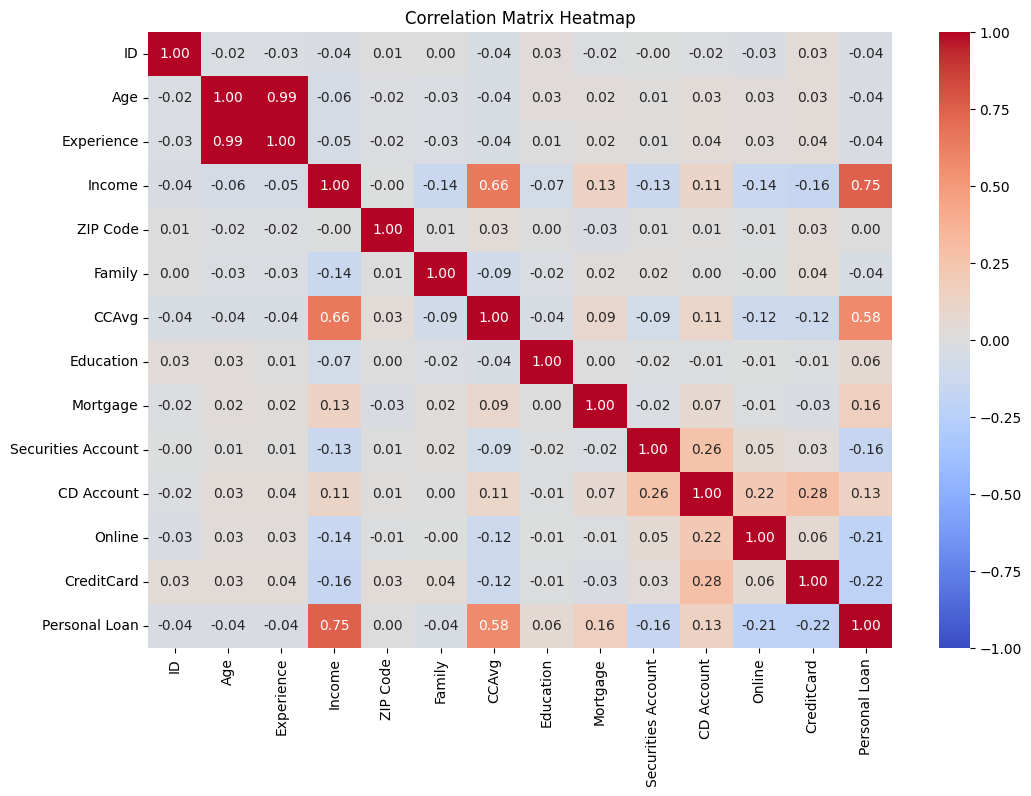

In [ ]:
# Correlation matrix and heatmap
corr_matrix = df_balanced.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

## 7. **Feature Engineering:**

In [ ]:
# Adding new features
df_balanced['Income_to_Mortgage_Ratio'] = df_balanced['Income'] / (df_balanced['Mortgage'] + 1 )
df_balanced['Credit_Card_Usage_Ratio'] = df_balanced['CCAvg'] / (df_balanced['Income'] + 1 )
df_balanced['Total_Assets'] = df_balanced['Income'] + df_balanced['Mortgage']


In [ ]:
df_balanced.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Personal Loan', 'Income_to_Mortgage_Ratio',
       'Credit_Card_Usage_Ratio', 'Total_Assets'],
      dtype='object')

In [ ]:
# Perform one-hot encoding for categorical features
df_encoded = pd.get_dummies(df_balanced, columns=['Education', 'Family'], prefix=['Education', 'Family'])

# Display the encoded dataframe
df_encoded.head(5)

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Securities Account,CD Account,Online,...,Income_to_Mortgage_Ratio,Credit_Card_Usage_Ratio,Total_Assets,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4
0,1,25,1,49,91107,0.955511,0.0,1,0,0,...,49.0,0.019110,49.0,True,False,False,False,False,False,True
1,2,45,19,34,90089,0.916291,0.0,1,0,0,...,34.0,0.026180,34.0,True,False,False,False,False,True,False
2,3,39,15,11,94720,0.693147,0.0,0,0,0,...,11.0,0.057762,11.0,True,False,False,True,False,False,False
3,4,35,9,100,94112,1.308333,0.0,0,0,0,...,100.0,0.012954,100.0,False,True,False,True,False,False,False
4,5,35,8,45,91330,0.693147,0.0,0,0,0,...,45.0,0.015068,45.0,False,True,False,False,False,False,True


In [ ]:
# Remove 'ID' and 'ZIP Code' as they are irrelevant for model building
data = df_encoded.drop(['ID', 'ZIP Code'], axis=1, errors='ignore')

In [ ]:
data.columns

Index(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Personal Loan', 'Income_to_Mortgage_Ratio', 'Credit_Card_Usage_Ratio',
       'Total_Assets', 'Education_1', 'Education_2', 'Education_3', 'Family_1',
       'Family_2', 'Family_3', 'Family_4'],
      dtype='object')

In [ ]:
data.shape

(9040, 20)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9040 entries, 0 to 9039
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       9040 non-null   int64  
 1   Experience                9040 non-null   int64  
 2   Income                    9040 non-null   int64  
 3   CCAvg                     9040 non-null   float64
 4   Mortgage                  9040 non-null   float64
 5   Securities Account        9040 non-null   int64  
 6   CD Account                9040 non-null   int64  
 7   Online                    9040 non-null   int64  
 8   CreditCard                9040 non-null   int64  
 9   Personal Loan             9040 non-null   int64  
 10  Income_to_Mortgage_Ratio  9040 non-null   float64
 11  Credit_Card_Usage_Ratio   9040 non-null   float64
 12  Total_Assets              9040 non-null   float64
 13  Education_1               9040 non-null   bool   
 14  Educatio

# 8. **Feature Selection:**

**Feature selection using Embeded method**

In [ ]:
from sklearn.linear_model import LassoCV

# Separate features and target variable
X = data.drop('Personal Loan', axis=1)
y = data['Personal Loan']

# Create a LassoCV model with cross-validation
lasso_cv = LassoCV(cv=5, random_state=42)

# Fit the model to the data
lasso_cv.fit(X, y)
coefficients = lasso_cv.coef_

# Identify the features with non-zero coefficients
selected_features = X.columns[coefficients != 0]

print("Selected features using Lasso:")
print(selected_features)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2105046124141836, tolerance: 0.1695
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.25610868727733305, tolerance: 0.1695
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.30680656882373114, tolerance: 0.1695
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not conv

Selected features using Lasso:
Index(['Age', 'Income', 'CCAvg', 'Online', 'Income_to_Mortgage_Ratio',
       'Total_Assets', 'Education_1', 'Education_2', 'Family_3'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.058e+00, tolerance: 2.260e-01
  model = cd_fast.enet_coordinate_descent(


In [ ]:
X = X.columns[coefficients != 0]
X

Index(['Age', 'Income', 'CCAvg', 'Online', 'Income_to_Mortgage_Ratio',
       'Total_Assets', 'Education_1', 'Education_2', 'Family_3'],
      dtype='object')

# 9. **Model building**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

In [ ]:
# Feature set and Target variable
X = data[selected_features]
y = data['Personal Loan']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[selected_features] = scaler.fit_transform(X_train[selected_features])
X_test[selected_features] = scaler.transform(X_test[selected_features])

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'MLP Classifier': MLPClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)    # Train the model
    y_pred = model.predict(X_test)   # Making predictions on the test

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f'\n{model_name}:')
    print(f'  Accuracy: {accuracy:.4f}')
    print(f'  Precision: {precision:.4f}')
    print(f'  Recall: {recall:.4f}')
    print(f'  F1-Score: {f1:.4f}')
    print(f'  ROC AUC: {roc_auc:.4f}')


Logistic Regression:
  Accuracy: 0.9043
  Precision: 0.8989
  Recall: 0.9040
  F1-Score: 0.9014
  ROC AUC: 0.9043

SVM:
  Accuracy: 0.9292
  Precision: 0.9269
  Recall: 0.9269
  F1-Score: 0.9269
  ROC AUC: 0.9291


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



MLP Classifier:
  Accuracy: 0.9320
  Precision: 0.9263
  Recall: 0.9337
  F1-Score: 0.9300
  ROC AUC: 0.9320

Random Forest:
  Accuracy: 0.9668
  Precision: 0.9605
  Recall: 0.9714
  F1-Score: 0.9659
  ROC AUC: 0.9670

Gradient Boosting:
  Accuracy: 0.9535
  Precision: 0.9459
  Recall: 0.9589
  F1-Score: 0.9523
  ROC AUC: 0.9537


### **ROC - AUC Curve**

Let's plot the ROC AUC curve for the Random Forest model. The ROC (Receiver Operating Characteristic) curve shows the performance of the classifier at various threshold settings, while the AUC (Area Under the Curve) summarizes the overall performance

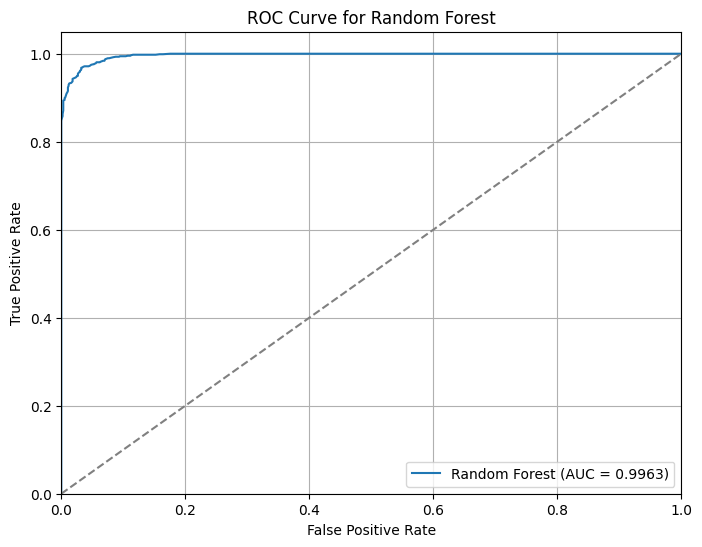

In [ ]:
#Predict probabilities
y_pred_proba = models['Random Forest'].predict_proba(X_test)[:, 1]

#Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_rf = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()




## **Analysis of Model building**

Here I have used 3 methods of feature selection (Filter Method, Wrapping Method, Embeded Method) and build model with these different features selected to achieve best model with best features.

Random Forest:

    Filter Method: Accuracy: 0.9535, ROC AUC : 0.9958
    Wrapper Method: Accuracy: 0.9298, ROC AUC: 0.9288
    Embedded Method: Accuracy: 0.9668, ROC AUC: 0.9963

The Random Forest classifier performs exceptionally well across all methods, achieving the highest accuracy and ROC AUC in the embedded method.

SVM:

SVM performs consistently well but does not exceed the performance of Random Forest in the embedded method.

**Random Forest appears to be the best choice for the project based on the overall performance metrics, particularly in the embedded method, where it achieved the highest accuracy and ROC AUC. It provides a good balance of precision and recall, which is critical for many classification tasks.**


# 11. **Hyperparameter Tuning:**

Hyperparameter tuning is for optimizing the performance of the Random Forest model.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [ 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize and fit GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_rf = grid_search.best_estimator_

# Train the best model on the entire training data
best_rf.fit(X_train , y_train)
y_pred = best_rf.predict(X_test)

# Evaluate the best model on the test data
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-Score: {f1:.4f}")

print(f"Best Hyperparameters: {grid_search.best_params_}")



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Test Accuracy: 0.9602
Test Precision: 0.9516
Test Recall: 0.9669
Test F1-Score: 0.9592
Best Hyperparameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


Hyperparameter tuning process has identified the best set of hyperparameters for the Random Forest model, with:

    Test Accuracy: 0.9602
    Test Precision: 0.9516
    Test Recall: 0.9669
    Test F1-Score: 0.9592



Based on these results, the hyperparameter tuning does not seem to have significantly enhanced the model's performance, which may suggest that the default parameters of the Random Forest model were also quite well-suited to this problem.

    Bootstrap: True (uses bootstrapped samples for training each tree)
    Max Depth: 30 (allows deep trees for capturing complex patterns)
    Max Features: 'sqrt' (randomly selects a subset of features for splits)
    Min Samples Leaf: 2 (requires at least 2 samples in a leaf node)
    Min Samples Split: 5 (requires at least 5 samples to split a node)
    N Estimators: 300 (utilizes 300 trees for improved performance

## Test with Unseen Data

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report

In [ ]:
unseen_data = {
    "ID": [11],
    "Age": [28],
    "Experience": [3],
    "Income": [52],
    "ZIP Code": [91234],
    "Family": [2],
    "CCAvg": [2.0],
    "Education": [1],
    "Mortgage": [0],
    "Personal Loan": [0],
    "Securities Account": [0],
    "CD Account": [1],
    "Online": [0],
    "CreditCard": [1]
}
import pandas as pd
new_data = pd.DataFrame(unseen_data)


In [ ]:
unseen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  1 non-null      int64  
 1   Age                 1 non-null      int64  
 2   Experience          1 non-null      int64  
 3   Income              1 non-null      int64  
 4   ZIP Code            1 non-null      int64  
 5   Family              1 non-null      int64  
 6   CCAvg               1 non-null      float64
 7   Education           1 non-null      int64  
 8   Mortgage            1 non-null      int64  
 9   Personal Loan       1 non-null      int64  
 10  Securities Account  1 non-null      int64  
 11  CD Account          1 non-null      int64  
 12  Online              1 non-null      int64  
 13  CreditCard          1 non-null      int64  
dtypes: float64(1), int64(13)
memory usage: 240.0 bytes


In [ ]:
# 1. Handle negative values in the 'Experience' column (if any)
new_data['Experience'] = new_data['Experience'].apply(lambda x: abs(x))

# 2. Log transformation for 'CCAvg' and 'Mortgage'
new_data['CCAvg'] = np.log1p(new_data['CCAvg'])
new_data['Mortgage'] = np.log1p(new_data['Mortgage'])

# 3. Square root transformation for 'Mortgage' (if needed)
new_data['Mortgage'] = np.cbrt(new_data['Mortgage'])

# 4. Feature Engineering
new_data['Income_to_Mortgage_Ratio'] = new_data['Income'] / (new_data['Mortgage'] + 1)
new_data['Credit_Card_Usage_Ratio'] = new_data['CCAvg'] / (new_data['Income'] + 1)
new_data['Total_Assets'] = new_data['Income'] + new_data['Mortgage']

# 6. Remove irrelevant features
new_data_processed = new_data_encoded.drop(['ID', 'ZIP Code'], axis=1, errors='ignore')

# 5. One-hot encoding for categorical features
new_data_encoded = pd.get_dummies(new_data, columns=['Education', 'Family'], prefix=['Education', 'Family'])

# Ensure the necessary columns for model input
required_columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Securities Account', 'CD Account',
                    'Online', 'CreditCard', 'Income_to_Mortgage_Ratio', 'Credit_Card_Usage_Ratio', 'Total_Assets',
                    'Education_1', 'Education_2', 'Education_3', 'Family_1', 'Family_2', 'Family_3', 'Family_4']

# Handle missing columns from one-hot encoding
for col in required_columns:
    if col not in unseen_df_encoded.columns:
        unseen_df_encoded[col] = 0





In [ ]:
unseen_df_encoded

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,...,Income_to_Mortgage_Ratio,Credit_Card_Usage_Ratio,Total_Assets,Education_1,Family_2,Education_2,Education_3,Family_1,Family_3,Family_4
0,11,28,3,52,91234,1.098612,0.0,0,0,1,...,52.0,0.020729,52.0,True,True,0,0,0,0,0


In [ ]:
X_new =

In [ ]:
# 7. Select features for the model
X_new = unseen_df_encoded[selected_features]

# 8. Scale the features (using the same scaler used for training)
X_new[selected_features] = scaler.transform(X_new[selected_features])

# 9. Predict using the best model
y_pred_new = best_rf.predict(X_new)
y_pred_new




<ipython-input-87-025f3487f466>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new[selected_features] = scaler.transform(X_new[selected_features])


array([0])

In [ ]:
# Print the prediction
print("Prediction for unseen data:", y_pred_new)

Prediction for unseen data: [0]


In [ ]:
if (y_pred_new) == 0:
  print("The personal loan is not accepted")
else:
  print("The personal loan is accepted")



The personal loan is not accepted


In [ ]:
# Save the Model
from joblib import dump, load
dump(best_rf, 'random_forest_classifier.joblib')

# Load the saved Model
loaded_model = load('random_forest_classifier.joblib')

In [ ]:
# Predicting trained data using loaded model

y_pred_loaded = loaded_model.predict(X_new)
y_pred_loaded


array([0])